In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../store.csv",header=0,index_col=0)
df.drop(['Volume','Date'], axis=1, inplace=True)
df.dropna(inplace=True)
df.head(10)

,Open,High,Low,Close
0,12937.4,13055.6,12881.2,12949.4
1,12822.2,12934.9,12778.0,12840.2
2,12830.5,12831.6,12537.7,12579.9
3,12557.4,12727.0,12514.8,12563.2
4,12564.5,12819.1,12514.8,12787.2
5,12845.3,13002.8,12838.8,12958.5
6,12989.5,13040.2,12913.9,12987.1
7,12961.3,13176.0,12957.9,13122.1
8,13134.5,13268.6,12968.8,13034.5
9,13039.0,13116.0,12927.8,13081.5


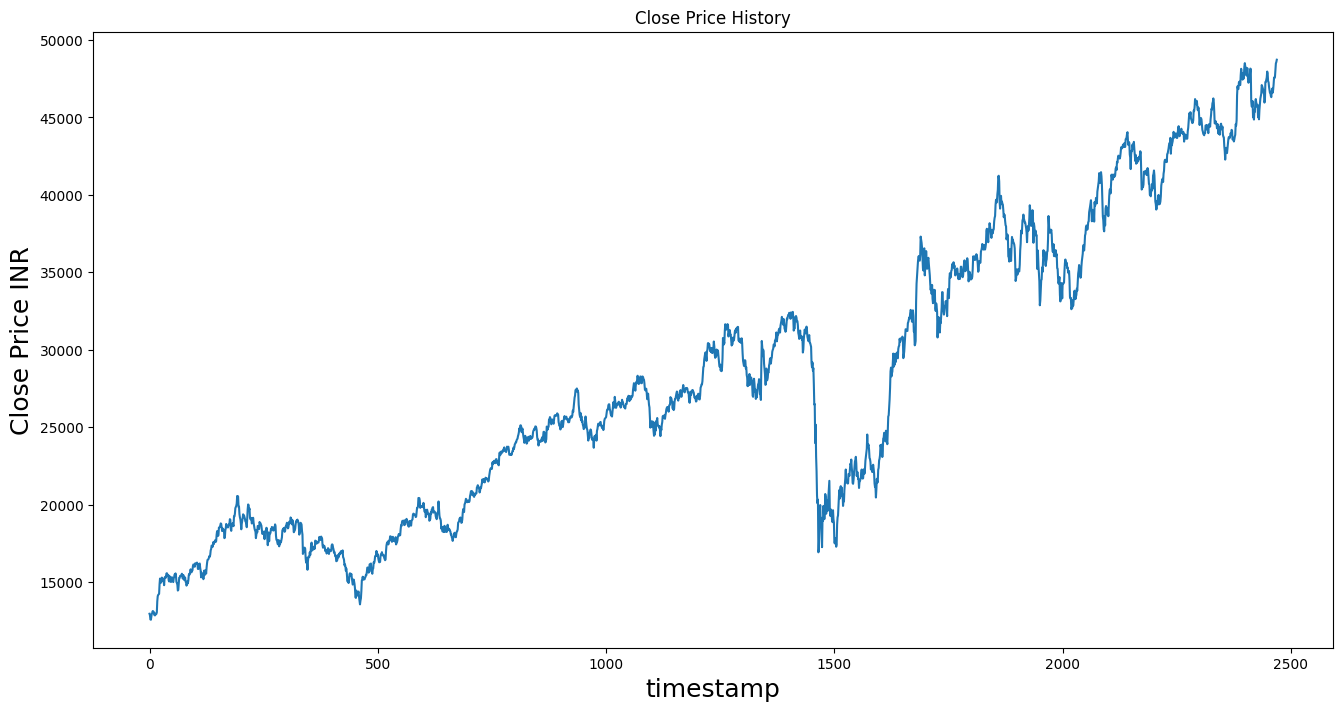

In [3]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('timestamp',fontsize=18)
plt.ylabel('Close Price INR',fontsize=18)
plt.show()

In [4]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil( len(dataset) *.8) 

In [5]:
dataset

array([[12949.4 ],
       [12840.2 ],
       [12579.9 ],
       ...,
       [48493.05],
       [48581.7 ],
       [48730.55]])

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [7]:
train_data = scaled_data[0:training_data_len  , : ]
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [8]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train

array([[1.06781393e-02, 7.65884147e-03, 4.61742428e-04, ...,
        8.27541968e-02, 7.75395488e-02, 6.73065624e-02],
       [7.65884147e-03, 4.61742428e-04, 0.00000000e+00, ...,
        7.75395488e-02, 6.73065624e-02, 6.54706524e-02],
       [4.61742428e-04, 0.00000000e+00, 6.19343137e-03, ...,
        6.73065624e-02, 6.54706524e-02, 6.24458248e-02],
       ...,
       [7.15534868e-01, 7.23425963e-01, 7.16300752e-01, ...,
        7.05185755e-01, 6.93155567e-01, 6.91070814e-01],
       [7.23425963e-01, 7.16300752e-01, 7.13549652e-01, ...,
        6.93155567e-01, 6.91070814e-01, 6.96454122e-01],
       [7.16300752e-01, 7.13549652e-01, 7.09283373e-01, ...,
        6.91070814e-01, 6.96454122e-01, 6.92630231e-01]])

In [9]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train

array([[[1.06781393e-02],
        [7.65884147e-03],
        [4.61742428e-04],
        ...,
        [8.27541968e-02],
        [7.75395488e-02],
        [6.73065624e-02]],

       [[7.65884147e-03],
        [4.61742428e-04],
        [0.00000000e+00],
        ...,
        [7.75395488e-02],
        [6.73065624e-02],
        [6.54706524e-02]],

       [[4.61742428e-04],
        [0.00000000e+00],
        [6.19343137e-03],
        ...,
        [6.73065624e-02],
        [6.54706524e-02],
        [6.24458248e-02]],

       ...,

       [[7.15534868e-01],
        [7.23425963e-01],
        [7.16300752e-01],
        ...,
        [7.05185755e-01],
        [6.93155567e-01],
        [6.91070814e-01]],

       [[7.23425963e-01],
        [7.16300752e-01],
        [7.13549652e-01],
        ...,
        [6.93155567e-01],
        [6.91070814e-01],
        [6.96454122e-01]],

       [[7.16300752e-01],
        [7.13549652e-01],
        [7.09283373e-01],
        ...,
        [6.91070814e-01],
        [6.9645

In [10]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

c:\Users\91952\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
model.fit(x_train, y_train, batch_size=64, epochs=10)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0556
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0021
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.4934e-04
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 6.6657e-04
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 5.9706e-04
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 6.4500e-04
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.0528e-04
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.1975e-04
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 6.9454e-04
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.7883e-04


In [13]:
test_data = scaled_data[training_data_len - 60: , : ]
x_test = []
y_test =  dataset[training_data_len : , : ] 
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])


In [14]:
x_test = np.array(x_test)

In [15]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [16]:
predictions = model.predict(x_test) 


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [18]:
predictions = scaler.inverse_transform(predictions)

In [20]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

877.282108109332

C:\Users\91952\AppData\Local\Temp\ipykernel_19944\736534303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  display['Predictions'] = predictions


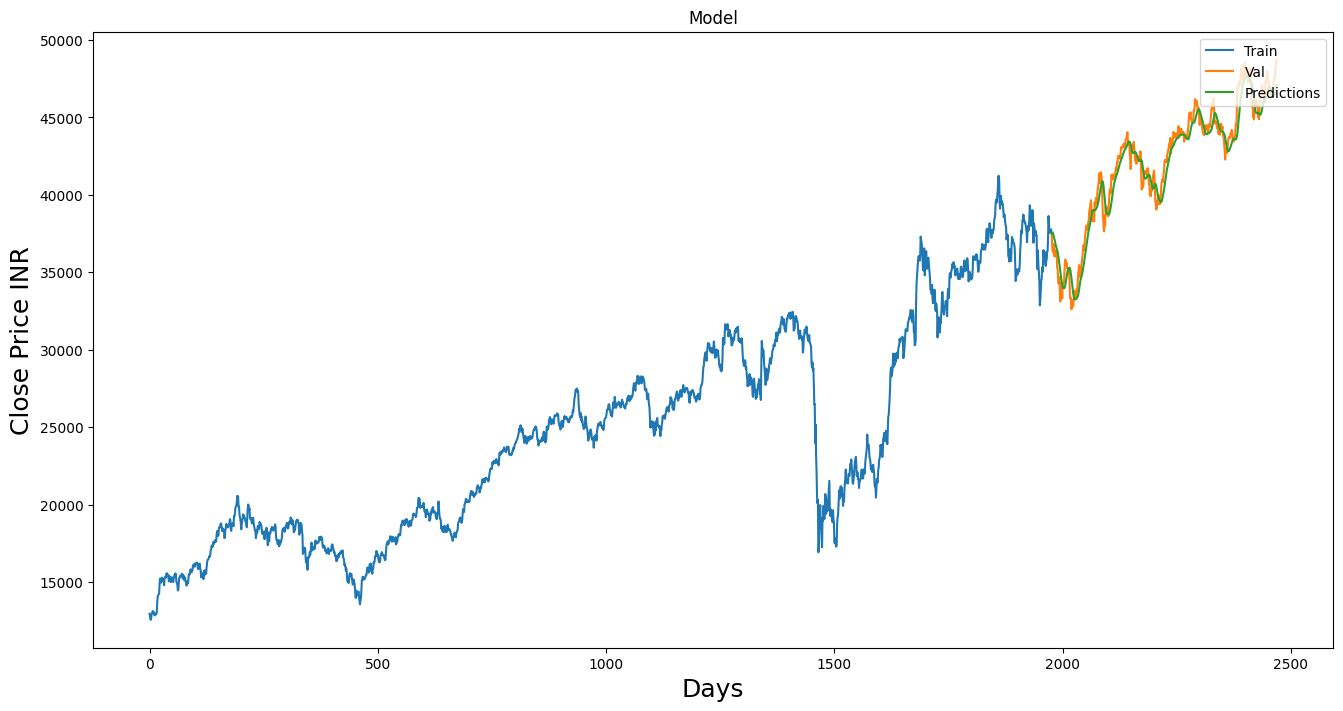

In [23]:
train = data[:training_data_len]
display = data[training_data_len:]
display['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.plot(train['Close'])
plt.plot(display['Close'])
plt.plot(display['Predictions'])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()

In [22]:
display

,Close,Predictions
1976,37463.40,37486.343750
1977,36729.00,37572.882812
1978,36341.60,37581.019531
1979,36314.90,37514.710938
1980,36816.10,37402.726562
...,...,...
2465,47624.25,46513.414062
2466,48060.80,46607.085938
2467,48493.05,46733.203125
2468,48581.70,46898.281250


In [ ]:
def backtest()